from google.colab import drive 
drive.mount('/content/drive')
%cd /content/drive/My\ Drive/BATH//Dissertaion/Colab
!pip install wandb
!pip install pyDOE
!pip install stable_baselines3

try:
    import dolfin
except ImportError:
    !wget "https://fem-on-colab.github.io/releases/fenics-install.sh" -O "/tmp/fenics-install.sh" && bash "/tmp/fenics-install.sh"
    import dolfin

#!pip install cloud-tpu-client==0.10 https://storage.googleapis.com/tpu-pytorch/wheels/torch_xla-1.9-cp37-cp37m-linux_x86_64.whl

In [2]:
import cv2

#import libraries
import gym

import time
import wandb
import numpy as np

import torch 
from matplotlib import pyplot as plt
from IPython.display import clear_output
from tqdm import tqdm 
from dataclasses import dataclass
from typing import Any
from models import Model as Stock_NN
from models import ConvModel2 as ConvModel

import matplotlib.pyplot as plt
is_ipython = 'inline' in plt.get_backend()
if is_ipython: from IPython import display
if is_ipython: display.clear_output(wait=True)

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.6) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [4]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.ticker
plt.rcParams['figure.figsize'] = [15, 10]

import numpy as np
import time
from pyDOE import lhs         #Hypercube Sampling
import scipy.io

#Set default dtype to float32
torch.set_default_dtype(torch.float)


In [4]:
sensor_coords = np.array([[0.1, -0.9],[0.9,0.9],[0.5,0.45]])


In [5]:
from environment import heat_diffusion

env = heat_diffusion(dt = 1e-1, sensor_coords = sensor_coords)

In [6]:
from Agents import DQN_Agent

In [ ]:
Agent = DQN_Agent(env,
                 learning_rate = 1e-4, 
                 discount_rate = 0.99,
                 eps_max = 0.2, 
                 eps_min = 0.05,
                 eps_decay = 1e-8, 
                 boltzman_exploration = False,
                 min_rb_size = 10000, #200, 
                 sample_size = 500, #300
                 model_train_freq = 5,
                 tgt_update_freq = 1000,
                 max_epoch = 400, #100, 
                 load_PINN = None,
                 load_model = None,
                 device = 'cuda:0',
                 name = None,
                 description = 'Diffusion_PINN_run_'+str(13))
  
r = str(np.random.random())[2:8] # random marker
print(r)
Agent.train(identifier = r, episode_num = 0)


224596


wandb: Currently logged in as: jacob-turner (use `wandb login --relogin` to force relogin)
wandb: wandb version 0.11.1 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


20981it [2:00:10, 22.22s/it] 

In [ ]:
Agent.train(max_epoch = np.inf, identifier = 434432, episode_num = 0)

In [11]:
Agent.run_episode(render=True, explore = False, 
                 load_PINN = 'models/PINN_3D_Diffusion_300_episodes_2223432.pth',
                 load_model = 'models/CNN_3D_Diffusion_300_episodes_2223432.pth'
                 )

-95.7831973481748

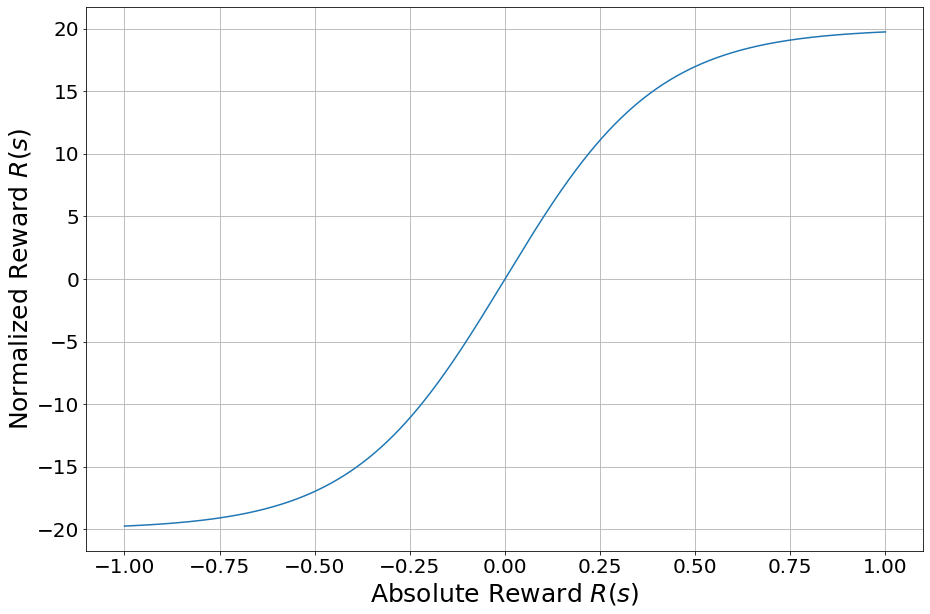

In [7]:
def f(x):
    return 40/(1+np.exp(-5*x)) - 20

x = np.linspace(-1,1,1000)
plt.plot(x,f(x))
plt.ylabel('Normalized Reward $R(s)$', size = 25)
plt.xlabel('Absolute Reward $R(s)$', size = 25)
plt.grid()
plt.tick_params(axis='both', which='major', labelsize=20)


In [ ]:
avg_scores = []
i = 54
while True:
    scores = []
    Agent.train(identifier = i)
    i += 1
    print('Testing')
    print(Agent.pinn_model)
    
    
    for _ in range(5):
        env.reset()
        scores.append(Agent.test_episode(plot=False, env = env,
                                    load_PINN = Agent.pinn_model,
                                    load_model = Agent.cnn_model))
        print('scores: ',scores)
    print(Agent.pinn_model) 
    Agent = DQN_Agent(env,
                 learning_rate = 1e-4, 
                 discount_rate = 0.99,
                 eps_max = 0.5, 
                 eps_min = 0.01,
                 eps_decay = 1e-5, 
                 boltzman_exploration = False,
                 min_rb_size = 1000, #100, 
                 sample_size = 100, #10
                 model_train_freq = 50,
                 tgt_update_freq = 400,
                 max_epoch = 50, #100, 
                 load_PINN = Agent.pinn_model,#'models/PINN_3D_Diffusion_10050_325791_67.pth',
                 load_model = Agent.cnn_model,#'models/CNN_3D_Diffusion_10050_325791_67.pth',
                 device = 'cuda:0',
                 name = 'Heat_diffusion_PINN_3D')
    
    
    avg_scores.append(np.mean(scores))
    print(i, ' scores: ', avg_scores)

KeyboardInterrupt: 

In [28]:
env.reset()

array([[0.],
       [0.],
       [0.]])

In [10]:
Agent.test_episode(plot=False, env = env,
                 load_PINN = 'models/PINN_3D_Diffusion_300_episodes_2223432.pth',
                 load_model = 'models/CNN_3D_Diffusion_300_episodes_2223432.pth')

AttributeError: 'DQN_Agent' object has no attribute 'test_episode'

In [ ]:
from time import sleep
for i in range(4):
    plt.imshow(Agent.log['PINN'][122][i,:,:],vmin = -5, vmax = 5)
    
    plt.colorbar()
    plt.show()
    sleep(1)
    clear_output(wait=True)

NameError: name 'plt' is not defined